# OSEMN Step 3: Explore
# Difference between DA and TAZ boundaries

## Import dependencies

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import geopandas as gpd
import contextily as ctx
import os
from time import time

## Load geometry of GTHA Dissemination Areas (DAs)

In [2]:
data_path = '../../data/'
os.listdir(data_path)

['census', 'dmti', '.ipynb_checkpoints', 'teranet', 'misc', 'tts']

In [3]:
da_path = data_path + 'census/da_census_income_shapefile/'
os.listdir(da_path)

['da_census_income.prj',
 'da_census_income.cpg',
 'da_census_income.dbf',
 'da_census_income.shp',
 'da_census_income.shx']

----- GeoDataFrame loaded
in 4.15 seconds
with 9,182 rows
and 218 columns
-- Column names:
 Index(['OBJECTID', 'DAUID', 'CSDUID', 'CSDNAME', 'POP_TOT_IN', 'NUM_TOT_IN',
       'MEDIAN_TOT', 'NUM_AFT_TA', 'MEDIAN_AFT', 'NUM_MKT_IN',
       ...
       'AVG_AFTE_4', 'TOT_INC_LO', 'AVG_INC_LO', 'AVG_AFTE_5', 'TOT_INC__7',
       'AVG_INC_NO', 'AVG_AFTE_6', 'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object', length=218)
Taking the subset with columns
: ['DAUID', 'CSDUID', 'CSDNAME', 'geometry']

-- New column names:
 Index(['DAUID', 'CSDUID', 'CSDNAME', 'geometry'], dtype='object')


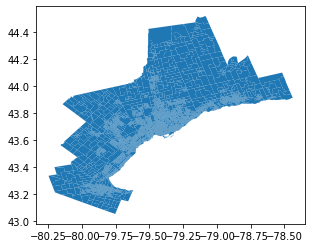

In [6]:
t = time()

# locally saved version of the Census Profiles of Income dataset
da_gdf = gpd.read_file(da_path + 'da_census_income.shp')

elapsed = time() - t

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(da_gdf.shape[0], da_gdf.shape[1]) + 
      "\n-- Column names:\n", da_gdf.columns)

cols = ['DAUID', 'CSDUID', 'CSDNAME', 'geometry']
da_gdf = da_gdf[cols]

print("Taking the subset with columns\n:", cols)

print("\n-- New column names:\n", da_gdf.columns)

da_gdf.plot();

## Load geometry of Traffic Analysis Zones (TAZ)

In [10]:
taz_path = data_path + 'tts/TAZ_2001shp/'
os.listdir(taz_path)

['TAZ_2001.dbf',
 'TAZ_2001.sbn',
 'TAZ_2001.shp',
 'TAZ_2001.shx',
 'TAZ_2001.cpg',
 'TAZ_2001.prj',
 'TAZ_2001.sbx']

----- GeoDataFrame loaded
in 0.31 seconds
with 1,716 rows
and 5 columns
-- Column names:
 Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'TAZ_O', 'geometry'], dtype='object')
Taking the subset with columns
: ['TAZ_O', 'geometry']

-- New column names:
 Index(['TAZ_O', 'geometry'], dtype='object')


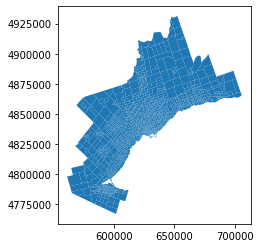

In [11]:
t = time()
taz_gdf = gpd.read_file(taz_path + 'TAZ_2001.shp')
elapsed = time() - t

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(taz_gdf.shape[0], taz_gdf.shape[1]) + 
      "\n-- Column names:\n", taz_gdf.columns)
      
cols = ['TAZ_O', 'geometry']

print("Taking the subset with columns\n:", cols)

taz_gdf = taz_gdf[cols]

print("\n-- New column names:\n", taz_gdf.columns)

taz_gdf.plot();

In [27]:
os.listdir('results/maps/')

['teranet_target_point_code_2014.png',
 'teranet_parking_ludmti.png',
 'teranet_parking_violinplot.png',
 'swarmplot_dmti_geo.png',
 'teranet_parking_swarmplot.png',
 'teranet_parking_lugeo.png',
 'swarmplot_pred9f_predaf.png',
 'teranet_target_point_lucr_2014.png',
 '.ipynb_checkpoints',
 'swarmplot_geo_predaf.png',
 'teranet_parking_ludmti_5000000.png',
 'alpha_shapes']

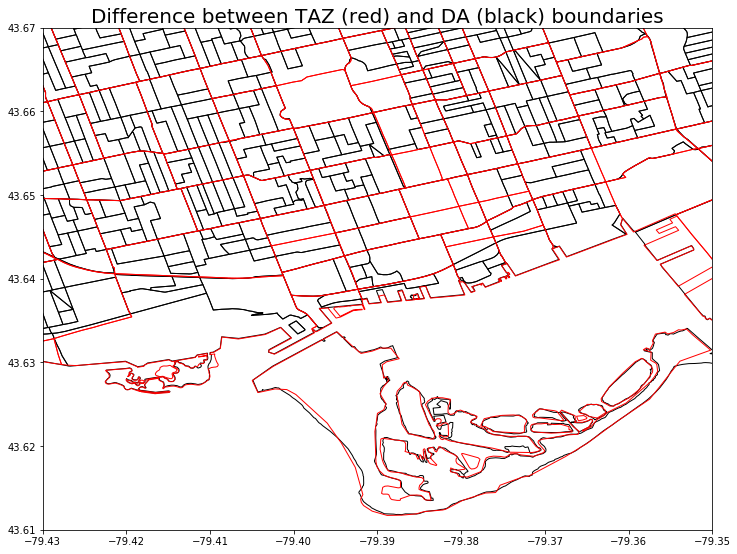

In [28]:
f, ax = plt.subplots(1, figsize=(12,12))
da_gdf.plot(ax=ax, color="None", edgecolor='black')
taz_gdf.to_crs(da_gdf.crs).plot(ax=ax, color="None", edgecolor='red')
ax.set_xlim(-79.43, -79.35)
ax.set_ylim(43.61, 43.67)
ax.set_title("Difference between TAZ (red) and DA (black) boundaries", fontsize=20)
f.savefig('results/maps/da_taz_difference.png', dpi=300)